In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from script.dataset import get_data, get_id_col, cols_emg, cols_emg_cal
from script.visualization import pretty_str

plt.rcParams["figure.figsize"] = (12,9)

In [3]:
X, y = get_data()

In [4]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X[cols_emg + cols_emg_cal])

In [7]:
hold_labels = pd.Categorical(y.loc[X['id']])
person_labels = pd.Categorical(get_id_col(X, 1))

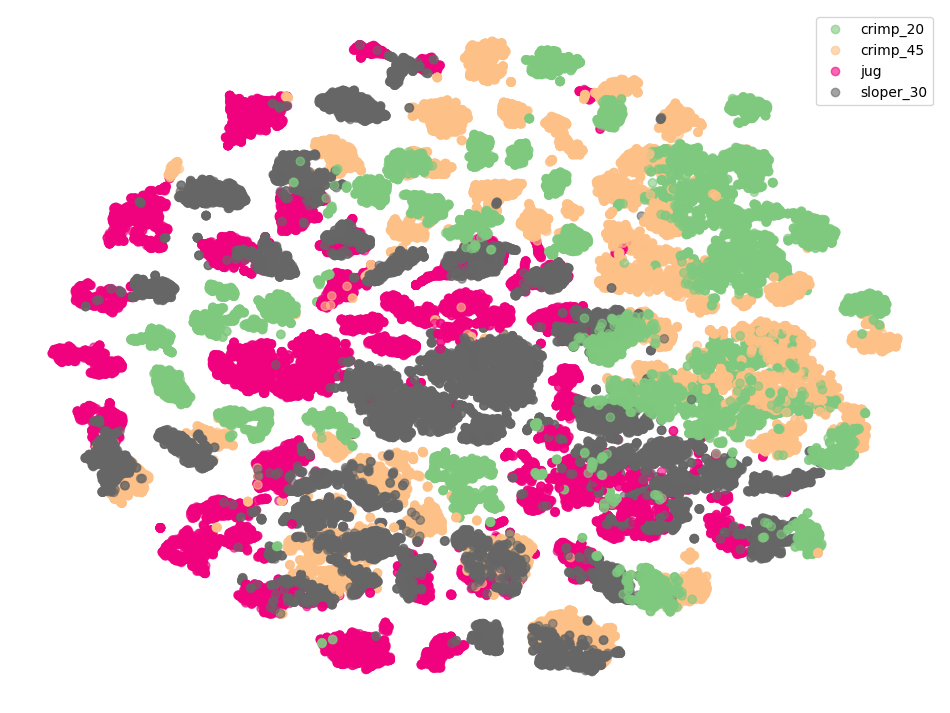

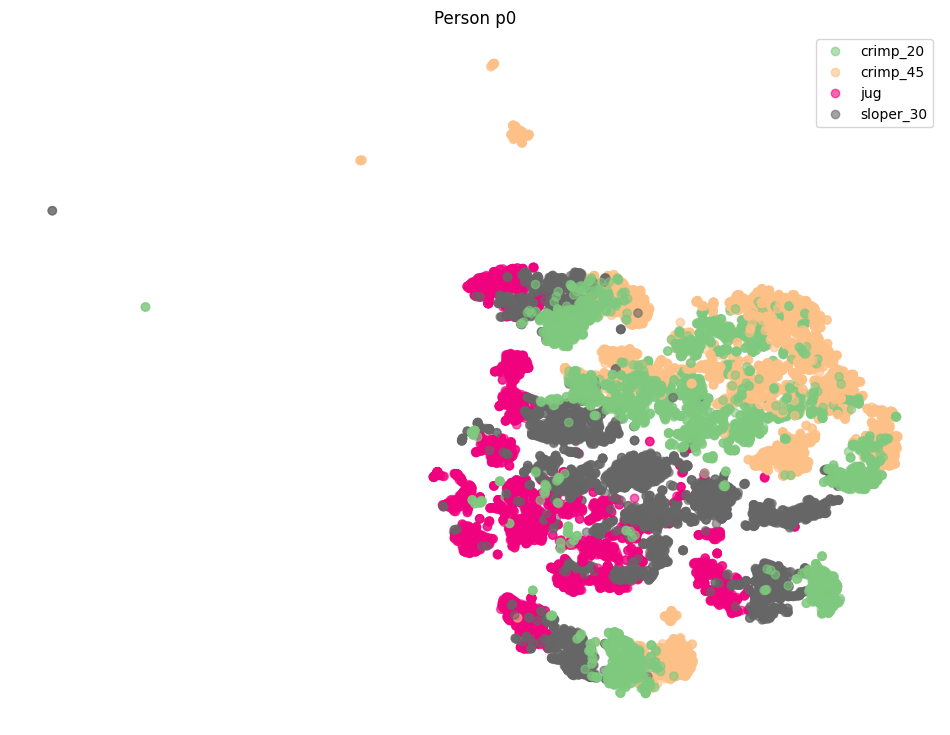

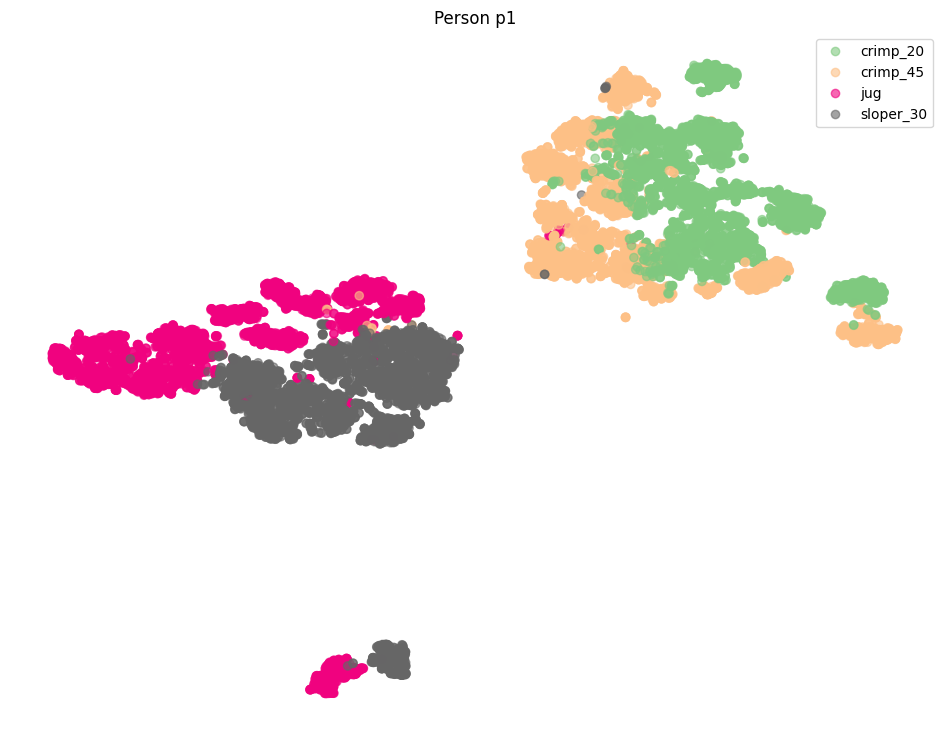

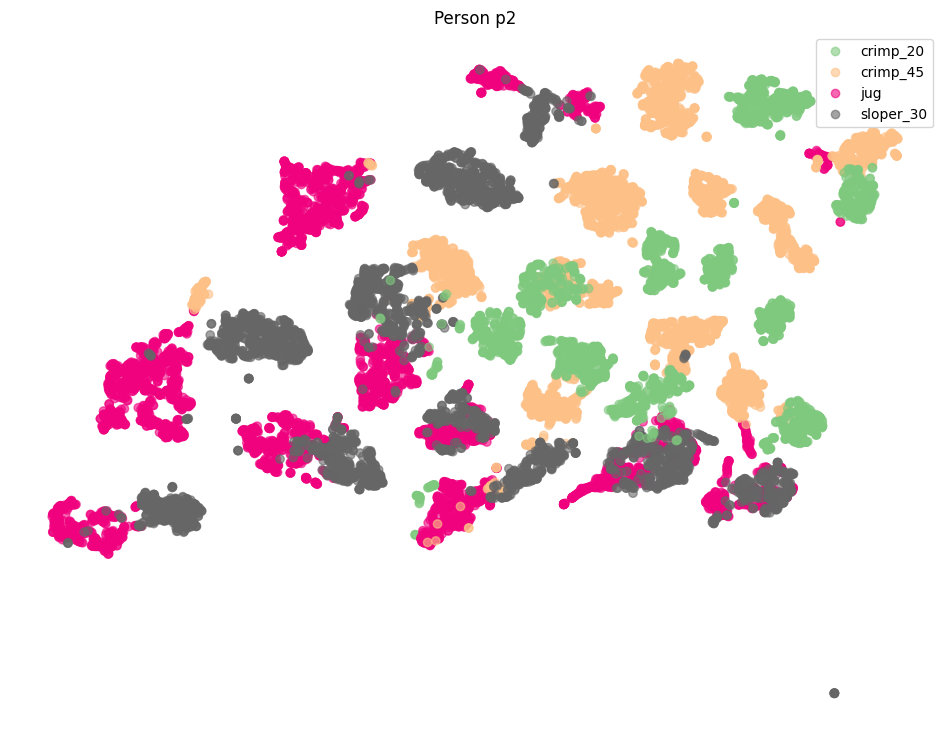

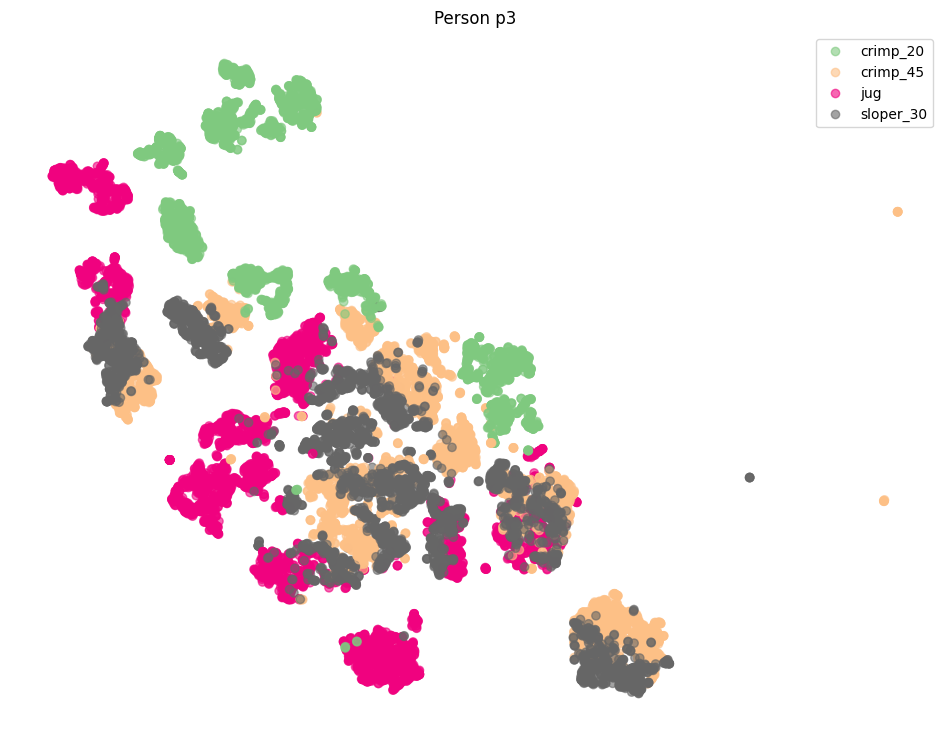

<Figure size 1200x900 with 0 Axes>

In [22]:
def _plot(condition, colors, title, save=False):
    plot = plt.scatter(
        X_tsne[condition,0], X_tsne[condition,1],
        c=colors.codes[condition],
        alpha=0.6, cmap='Accent')
    plt.legend(handles=plot.legend_elements()[0], labels=list(colors.categories))
    plt.title(title)
    plt.axis('off')
    if save:
        plt.savefig(f'{title}.png')
    else:
        plt.show()

_plot([True] * len(hold_labels), hold_labels, '')
plt.clf()
    
for p in person_labels.categories:
    _plot(person_labels == p, hold_labels, f'Person {p}')
    plt.clf()